In [1]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import json, io, requests, string
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import pandas as pd
import numpy as np


class CustomDatasetFromImages(Dataset):
    def __init__(self, csv_path):
        """
        Args:
            csv_path (string): path to csv file
            img_path (string): path to the folder where images are
            transform: pytorch transforms for transforms and tensor conversion
        """
        # Transforms
        self.to_tensor = transforms.ToTensor()
        # Read the csv file
        self.data_info = pd.read_csv(csv_path, header=None)
        # First column contains the image paths
        self.image_arr = np.asarray(self.data_info.iloc[:, 0])
        # Second column is the labels
        self.label_arr = np.asarray(self.data_info.iloc[:, 1])
        # Third column is for an operation indicator
        self.operation_arr = np.asarray(self.data_info.iloc[:, 2])
        # Calculate len
        self.data_len = len(self.data_info.index)

    def __getitem__(self, index):
        # Get image name from the pandas df
        single_image_name = self.image_arr[index]
        # Open image
        img_as_img = Image.open(single_image_name)

        # Check if there is an operation
        some_operation = self.operation_arr[index]
        # If there is an operation
        if some_operation:
            # Do some operation on image
            # ...
            # ...
            pass
        # Transform image to tensor
        img_as_tensor = self.to_tensor(img_as_img)

        # Get label(class) of the image based on the cropped pandas column
        single_image_label = self.label_arr[index]

        return (img_as_tensor, single_image_label)

    def __len__(self):
        return self.data_len
if __name__ == "__main__":
    # Define transforms
    
    # Define custom dataset
    train_data = CustomDatasetFromImages("Train0.csv")
    validation_data = CustomDatasetFromImages("Val0.csv")
    
    # Define data loader
#     trainset = torch.utils.data.DataLoader(dataset=train_data,
#                                                     batch_size=100,
#                                                     shuffle=True)
    
#     valset = torch.utils.data.DataLoader(dataset=validation_data,
#                                                     batch_size=100,
#                                                     shuffle=False)
    
    #for images, labels in trainset:
        # Feed the data to the model

In [2]:
vgg16 = models.vgg16(pretrained=False)
vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [3]:
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import torch.optim as optim

preprocessFn = transforms.Compose(
    [transforms.Resize(256),  # 1. Resize smallest side to 256.
     transforms.CenterCrop(224), # 2. Crop the center 224x224 pixels.
     transforms.ToTensor(),
     transforms.Normalize(mean = [0.485, 0.456, 0.406],  # normalize.
                          std = [0.229, 0.224, 0.225])])
print(type(train_data))
# img = []
# labellist = []
imgtensor = torch.zeros(1768,3,224,224)
labeltensor = torch.LongTensor(1768,1).zero_()
counter = 0
for (i, (inputs, labels)) in enumerate(train_data):
    counter += 1
    art= transforms.ToPILImage()(inputs)
    imgtensor[i,:,:,:] = preprocessFn(art).unsqueeze(0)
#     print(labels)
    labeltensor[i,:] = torch.tensor(labels)

imgtensorVal = torch.zeros(328,3,224,224)
labeltensorVal = torch.LongTensor(328,1).zero_()
counter = 0
for (i, (inputs, labels)) in enumerate(validation_data):
    counter += 1
    art= transforms.ToPILImage()(inputs)
    imgtensorVal[i,:,:,:] = preprocessFn(art).unsqueeze(0)
#     print(labels)
    labeltensorVal[i,:] = torch.tensor(labels)
    
print(counter)
# Load the training, and validation datasets.


<class '__main__.CustomDatasetFromImages'>
328


<class 'torch.Tensor'>
torch.Size([3, 224, 224])
Train-epoch 0. Iteration 00010, Avg-Loss: 3.7540, Accuracy: 0.2000
Train-epoch 0. Iteration 00020, Avg-Loss: 2.9909, Accuracy: 0.2400
Train-epoch 0. Iteration 00030, Avg-Loss: 2.6268, Accuracy: 0.2600
Train-epoch 0. Iteration 00040, Avg-Loss: 2.4606, Accuracy: 0.2400
Train-epoch 0. Iteration 00050, Avg-Loss: 2.3628, Accuracy: 0.2160
Train-epoch 0. Iteration 00060, Avg-Loss: 2.2818, Accuracy: 0.2267
Train-epoch 0. Iteration 00070, Avg-Loss: 2.2368, Accuracy: 0.2200
Train-epoch 0. Iteration 00080, Avg-Loss: 2.1949, Accuracy: 0.2200
Train-epoch 0. Iteration 00090, Avg-Loss: 2.1695, Accuracy: 0.2178
Train-epoch 0. Iteration 00100, Avg-Loss: 2.1460, Accuracy: 0.2140
Train-epoch 0. Iteration 00110, Avg-Loss: 2.1260, Accuracy: 0.2127
Train-epoch 0. Iteration 00120, Avg-Loss: 2.1033, Accuracy: 0.2117
Train-epoch 0. Iteration 00130, Avg-Loss: 2.0932, Accuracy: 0.2062
Train-epoch 0. Iteration 00140, Avg-Loss: 2.0775, Accuracy: 0.2071
Train-epoch 0

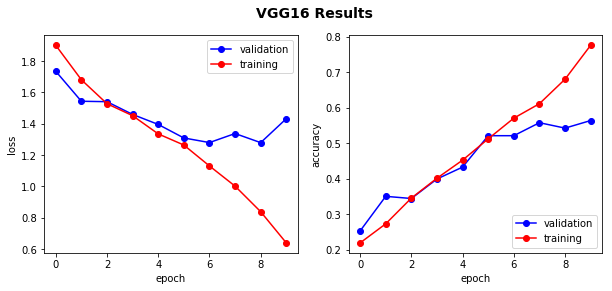

In [4]:
from random import shuffle
# randomizer = [i for i in range(2390)]
# shuffle(randomizer)
# print(randomizer)

train_accuracies = []; val_accuracies = []
train_losses = []; val_losses = []

trainset = torch.utils.data.TensorDataset(imgtensor, labeltensor)
valset = torch.utils.data.TensorDataset(imgtensorVal, labeltensorVal)

print(type(imgtensor))
print(imgtensor[0].shape)

def train_model(model, loss_fn, batchSize, trainset, valset, optimizer):
  
  # Shuffling is needed in case dataset is not shuffled by default.
  train_loader = torch.utils.data.DataLoader(dataset = trainset,
                                              batch_size = batchSize,
                                              shuffle = True)
#   # We don't need to bach the validation set but let's do it anyway.
  val_loader = torch.utils.data.DataLoader(dataset = valset,
                                             batch_size = batchSize,
                                             shuffle = False) # No need.
  
  # Define number of epochs.
  N = 10

  # log accuracies and losses.
  train_accuracies = []; val_accuracies = []
  train_losses = []; val_losses = []

  # GPU enabling.
  model = model.cuda()
  loss_fn = loss_fn.cuda()


  # Training loop. Please make sure you understand every single line of code below.
  # Go back to some of the previous steps in this lab if necessary.
  for epoch in range(0, N):
      correct = 0.0
      cum_loss = 0.0

      # Make a pass over the training data.
      #model.train()
      for (i, (inputs, labels)) in enumerate(train_loader):
          #print(type(inputs))
          inputs = inputs.cuda()
          labels = labels.cuda()
          #print(inputs.shape)
          #trans = transforms.ToPILImage()
          #img = transforms.ToPILImage()(inputs)
          #pil_img = trans(inputs)
          #input_img =  preprocessFn(pil_img).unsqueeze(0)
          # Forward pass. (Prediction stage)
          scores = model(inputs)
#           print(labels)
          loss = loss_fn(scores, labels.view(-1))
#           print(labels.view(-1))
#           print(scores.shape)
          # Count how many correct in this batch.
          max_scores, max_labels = scores.max(1)
#           print(max_labels)
#           print(labels.view(-1))
          correct += (max_labels == labels.view(-1)).sum().item()
          cum_loss += loss.item()

          # Zero the gradients in the network.
          optimizer.zero_grad()

          #Backward pass. (Gradient computation stage)
          loss.backward()

          # Parameter updates (SGD step) -- if done with torch.optim!
          optimizer.step()
          # Parameter updates (SGD step) -- if done manually!
          # for param in model.parameters():
          #   param.data.add_(-learningRate, param.grad)

          # Logging the current results on training.
          if (i + 1) % 10 == 0:
              print('Train-epoch %d. Iteration %05d, Avg-Loss: %.4f, Accuracy: %.4f' % 
                    (epoch, i + 1, cum_loss / (i + 1), correct / ((i + 1) * batchSize)))


      train_accuracies.append(correct / len(trainset))
      train_losses.append(cum_loss / (i + 1))   

      # Make a pass over the validation data.
      correct = 0.0
      cum_loss = 0.0
      model.eval()
      for (i, (inputs, labels)) in enumerate(val_loader):
           inputs = inputs.cuda()
           labels = labels.cuda()


#           # Forward pass. (Prediction stage)
           scores = model(inputs)
           cum_loss += loss_fn(scores, labels.view(-1)).item()

#            # Count how many correct in this batch.
           max_scores, max_labels = scores.max(1)
           correct += (max_labels == labels.view(-1)).sum().item()

      val_accuracies.append(correct / len(valset))
      val_losses.append(cum_loss / (i + 1))
      
      # Logging the current results on validation.
      print('Validation-epoch %d. Avg-Loss: %.4f, Accuracy: %.4f' % 
            (epoch, cum_loss / (i + 1), correct / len(valset)))
    
  fig = plt.figure(figsize = (10, 4))
  fig.suptitle('VGG16 Results', fontsize=14, fontweight='bold')
  plt.subplot(1, 2, 1)
  plt.plot(val_losses, 'bo-', label = 'val-loss')
  plt.plot(train_losses, 'ro-', label = 'train-loss') 
  plt.ylabel('loss')
  plt.xlabel('epoch') 
  plt.legend(['validation', 'training'], loc='upper right')

  plt.subplot(1, 2, 2)
  plt.plot(val_accuracies, 'bo-', label = 'val-acc')
  plt.plot(train_accuracies, 'ro-', label = 'train-acc')
  plt.ylabel('accuracy')
  plt.xlabel('epoch') 
  plt.legend(['validation', 'training'], loc='lower right')
  plt.show()      


      
model = vgg16
loss_fn = nn.CrossEntropyLoss()
    
# Create the model.
# Optimizer.
learningRate = 1e-4
optimizer = optim.Adam(model.parameters(), lr = learningRate)
batchSize = 5

train_model(model, loss_fn, batchSize, trainset, valset, optimizer)